In [1]:
import torch
from transformers import AutoModel

model = AutoModel.from_pretrained("bert-base-uncased")   # any HF checkpoint
total = 0
for name, param in model.named_parameters():
    print(f"{name:55s} {tuple(param.shape)}  requires_grad={param.requires_grad}")
    total += param.numel()

print(f"\nTotal parameters: {total:,}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

embeddings.word_embeddings.weight                       (30522, 768)  requires_grad=True
embeddings.position_embeddings.weight                   (512, 768)  requires_grad=True
embeddings.token_type_embeddings.weight                 (2, 768)  requires_grad=True
embeddings.LayerNorm.weight                             (768,)  requires_grad=True
embeddings.LayerNorm.bias                               (768,)  requires_grad=True
encoder.layer.0.attention.self.query.weight             (768, 768)  requires_grad=True
encoder.layer.0.attention.self.query.bias               (768,)  requires_grad=True
encoder.layer.0.attention.self.key.weight               (768, 768)  requires_grad=True
encoder.layer.0.attention.self.key.bias                 (768,)  requires_grad=True
encoder.layer.0.attention.self.value.weight             (768, 768)  requires_grad=True
encoder.layer.0.attention.self.value.bias               (768,)  requires_grad=True
encoder.layer.0.attention.output.dense.weight           (768, 7

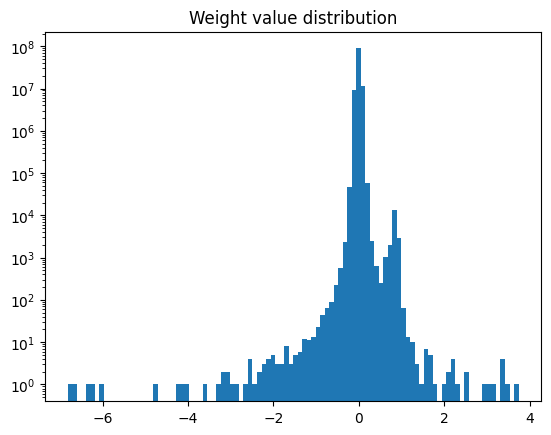

In [2]:
import matplotlib.pyplot as plt

with torch.no_grad():
    flat = torch.cat([p.flatten() for p in model.parameters()])
plt.hist(flat.cpu(), bins=100, log=True)
plt.title("Weight value distribution")
plt.show()


In [3]:
from accelerate import init_empty_weights, load_checkpoint_in_model
with init_empty_weights():
    model = AutoModel.from_config()          # builds layers w/o tensors
load_checkpoint_in_model(model, checkpoint_path, device_map="auto")


AttributeError: 'ellipsis' object has no attribute '_name_or_path'

In [4]:
import tensorflow as tf
model = tf.keras.applications.BERT()  # placeholder for any tf.keras.Model

for var in model.trainable_variables:
    print(f"{var.name:55s} {var.shape}  dtype={var.dtype}")

total = sum(tf.size(v).numpy() for v in model.trainable_variables)
print(f"Total parameters: {total:,}")


AttributeError: module 'keras.api.applications' has no attribute 'BERT'

In [5]:
from transformers import FlaxAutoModel
model = FlaxAutoModel.from_pretrained("bert-base-uncased")

def tree_size(tree):
    return sum(x.size for x in jax.tree_util.tree_leaves(tree))

params = model.params          # frozen dict
print(jax.tree_util.tree_map(lambda x: x.shape, params))  # shapes
print(f"Total parameters: {tree_size(params):,}")


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


flax_model.msgpack:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of FlaxBertModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: {('pooler', 'dense', 'bias'), ('pooler', 'dense', 'kernel')}
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


NameError: name 'jax' is not defined

In [6]:
tensor = dict(model.named_parameters())["encoder.layer.0.attention.self.query.weight"]
print(tensor)                     # prints a 768×768 matrix
print(tensor[0, :10])             # slice of first row


AttributeError: 'FlaxBertModel' object has no attribute 'named_parameters'

In [7]:
import numpy as np
np.save("q_proj.npy", tensor.cpu().numpy())


NameError: name 'tensor' is not defined